![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [141]:
import warnings
warnings.filterwarnings('ignore')

In [142]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora, mes, año y fecha como una variable 
bikes['hour'] = bikes.index.hour
bikes['month'] = bikes.index.month
bikes['year'] = bikes.index.year
bikes['date'] = bikes.index.date

# Visualización de los datos
bikes.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  total  hour  \
datetime                                                                    
2011-01-01 00:00:00        81        0.0       3          13     16     0   
2011-01-01 01:00:00        80        0.0       8          32     40     1   
2011-01-01 02:00:00        80        0.0       5          27     32     2   
2011-01-01 03:00:00        75        0.0       3          10     13     3   
2011-01-01 04:00:00        75        0.0       0           1      1     4   

                     month  year        date  
datetime                                      
2011-01-01 00:00:00      1  2011  2011-01-01  
2011-01-01 01:00:00      1  2011  2011-01-01  
2011-01-01 02:00:00      1  2011  2011-01-01  
2011-01-01 03:00:00      1  2011  2011-01-01  
2011-01-01 04:00:00      1  2011  2011-01-01

### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

Promedio de bicicletas rentadas por hora en cada temporada
                total
season               
Invierno   116.343261
Otoño      198.988296
Primavera  215.251372
Verano     234.417124

 Suma de bicicletas rentadas en cada temporada y por año
                 total
year season           
2011 Invierno    95131
     Otoño      211594
     Primavera  220006
     Verano     255248
2012 Invierno   217367
     Otoño      332440
     Primavera  368276
     Verano     385414

 Máximo # bicicletas rentadas en una hora por temporada y por año
                total
year season          
2011 Invierno     332
     Otoño        625
     Primavera    638
     Verano       628
2012 Invierno     801
     Otoño        948
     Primavera    873
     Verano       977

 Mínimo # bicicletas rentadas en una hora por temporada y por año
                total
year season          
2011 Invierno       1
     Otoño          1
     Primavera      1
     Verano         1
2012 Invierno       1
     Otoño   

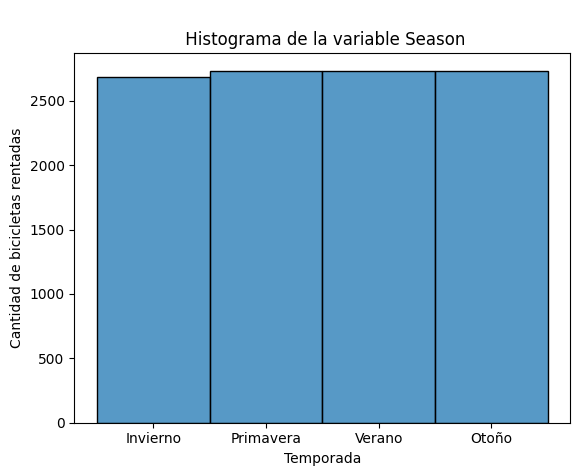

Estadisticas descriptivas de variable Total 


total
count  10886.000000
mean     191.574132
std      181.144454
min        1.000000
25%       42.000000
50%      145.000000
75%      284.000000
max      977.000000

In [144]:
# Celda 1.1

#Se reemplazan el nombre de la temporada 
bikes['season']=bikes['season'].replace([1,2,3,4],['Invierno', 'Primavera', 'Verano', 'Otoño'])

#Promedio de bicicletas rentadas por hora en cada temporada
a=pd.DataFrame(bikes.groupby('season').total.mean())
print('Promedio de bicicletas rentadas por hora en cada temporada')
print(a)

#Suma de bicicletas rentadas en cada temporada y por año
a=pd.DataFrame(bikes.groupby(['year', 'season']).total.sum())
print('\n Suma de bicicletas rentadas en cada temporada y por año')
print(a)

#Máximo # bicicletas rentadas en una hora por temporada y por año
a=pd.DataFrame(bikes.groupby(['year', 'season']).total.max())
print('\n Máximo # bicicletas rentadas en una hora por temporada y por año')
print(a)

#Mínimo # bicicletas rentadas en una hora por temporada y por año
a=pd.DataFrame(bikes.groupby(['year', 'season']).total.min())
print('\n Mínimo # bicicletas rentadas en una hora por temporada y por año')
print(a)

#Bicicletas rentadas por año
a=pd.DataFrame(bikes.groupby(['year']).total.sum())
print('\n Bicicletas rentadas por año')
print(a)
print('El incremento de usuarios en el 2012 respecto al 2011 fue de:  {:.2%}'.format(float(a.loc[2012]/a.loc[2011]-1)))

p=sns.histplot(bikes['season'], bins="auto" )
plt.title("\n Histograma de la variable Season")
plt.xlabel("Temporada")
plt.ylabel("Cantidad de bicicletas rentadas")
plt.show()

print("Estadisticas descriptivas de variable Total ")
display(pd.DataFrame(bikes.total.describe()))


* El total de registros es de 10.886 horas en las que se rentaron bicicletas. La distribución por temporada es casi igual, con un promedio de 2700 horas por temporada.

* La temporada con un mayor promedio de bicicletas rentadas por hora es verano y le sigue la primavera, lo cual se explica porque por la temperatura del día, pues montar bicicleta es más agradable con un día soleado; adicionalmente, es una temporada de vacaciones

*  La hora en que más se rentaron bicicletas fue de 977 unidades y el menor es 1.

* La mediana del número de bicicletas rentadas por hora es de 145

* Se aprecia un incremento entre el 2011 y el 2012 del 67%



In [ ]:
a=bikes.groupby('hour')
b=a['total'].agg([np.sum, np.mean, np.std, np.max, np.min])
print(b)

         sum        mean         std  amax  amin
hour                                            
0      25088   55.138462   43.620012   283     2
1      15372   33.859031   34.112105   168     1
2      10259   22.899554   26.110267   119     1
3       5091   11.757506   12.666442    66     1
4       2832    6.407240    4.217633    28     1
5       8935   19.767699   12.784293    57     1
6      34698   76.259341   54.745333   213     1
7      96968  213.116484  159.207044   596     1
8     165060  362.769231  231.723065   839     8
9     100910  221.780220   92.099209   414    14
10     79667  175.092308  101.807629   539    17
11     95857  210.674725  127.444294   647    10
12    116968  256.508772  143.881880   757     3
13    117551  257.787281  149.167185   729    11
14    111010  243.442982  147.563199   730    12
15    115960  254.298246  144.235670   724     7
16    144266  316.372807  145.664786   783    11
17    213757  468.765351  223.775485   970    15
18    196472  430.85

      count        mean         std   min     25%    50%     75%    max
hour                                                                   
0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
1     454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0
2     448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0
3     433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0
4     442.0    6.407240    4.217633   1.0    3.00    6.0    9.00   28.0
5     452.0   19.767699   12.784293   1.0    8.00   19.0   29.00   57.0
6     455.0   76.259341   54.745333   1.0   24.50   75.0  118.00  213.0
7     455.0  213.116484  159.207044   1.0   63.00  208.0  334.00  596.0
8     455.0  362.769231  231.723065   8.0  133.50  392.0  563.50  839.0
9     455.0  221.780220   92.099209  14.0  161.00  217.0  294.50  414.0
10    455.0  175.092308  101.807629  17.0  106.00  149.0  218.50  539.0
11    455.0  210.674725  127.444294  10.0  123.00  183.0  265.50

<BarContainer object of 24 artists>

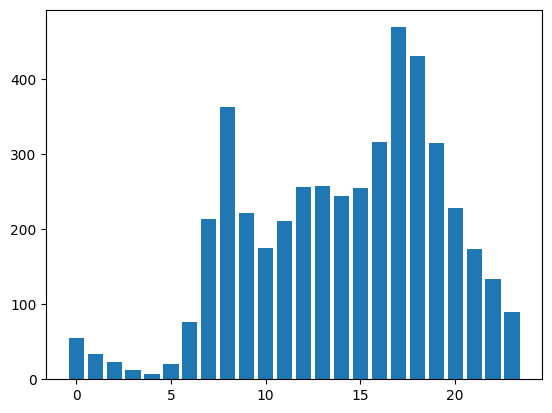

In [ ]:
# Celda 1.2
b_hour=bikes.groupby('hour').total.describe()
print(b_hour)
plt.bar(b_hour.index,b_hour['mean'])

* Las horas que tienen un mayor promedio son las 8, 17 y 18. Esto se puede explicar porque son las horas de ingreso y salida de trabajo.

* El pico de máximo número de bicicletas rentadas se produce en las mismas horas

* En la madrugada la demanda de bicicletas es muy baja respecto el resto del día

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

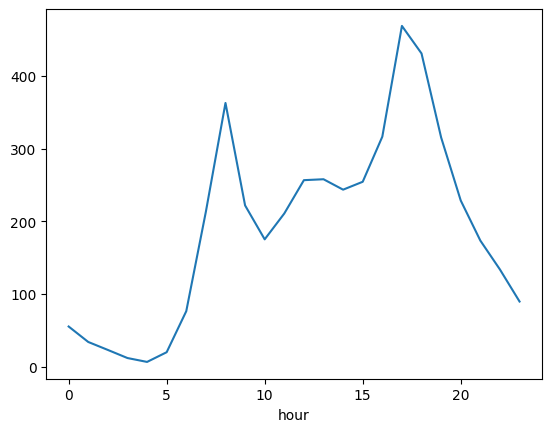

In [ ]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

La gráfica muestra el promedio por hora del número de bicicletas rentadas. La línea de tendencia muestra el comportamiento de cuales son las horas del día donde hay mayor demanda, sin distinguir el día de la semana, mes, temporada u otras variables. De esta gráfica se puede concluir que las horas pico son el inicio de la jornada laboral (8:00) y el final (17:00-18:00). Al medio día también se puede identificar que hay un pico no tan pronunciado y que en la madrugada es el lapso donde casi no se alquilan bicicletas.

           total
hour            
0      28.292035
1      18.761062
2      13.205607
3       7.760417
4       3.336634
5      10.300000
6      42.725664
7     124.433628
8     253.345133
9     154.442478
10    102.168142
11    122.601770
12    154.412281
13    160.771930
14    151.263158
15    159.087719
16    188.640351
17    283.456140
18    258.157895
19    176.315789
20    124.394737
21     95.298246
22     72.912281
23     45.333333


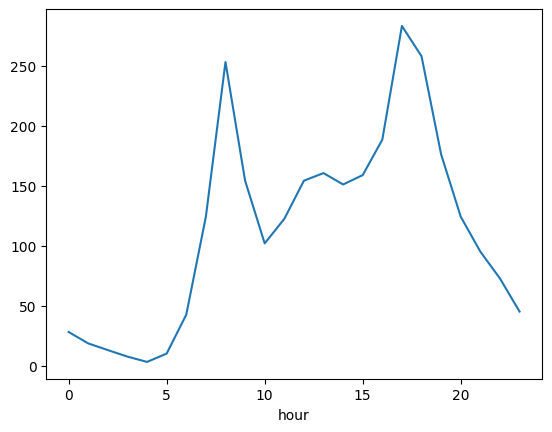

In [ ]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
index_F = bikes[ bikes['season'] != 'Invierno' ].index
b_inv=bikes.drop(index_F)
gr=pd.DataFrame(b_inv.groupby('hour').total.mean())
b_inv.groupby('hour').total.mean().plot()
print(gr)



Cuando se hace el análisis solo para la temporada de invierno, se puede ver que el comportamiento de la renta de bicicletas tiene una tendencia similar al caso completo; los picos de mayor demanda se presentan al inicio y fin de la jornada, alcanzado como máximo el número de 283 bicicletas a las 17 horas. 

           total
hour            
0      75.675439
1      44.831858
2      31.707965
3      15.778761
4       8.087719
5      25.728070
6      96.780702
7     264.035088
8     403.508772
9     250.710526
10    218.535088
11    256.877193
12    307.017544
13    304.421053
14    286.350877
15    294.956140
16    371.324561
17    565.385965
18    539.070175
19    413.500000
20    307.842105
21    236.017544
22    180.789474
23    121.719298


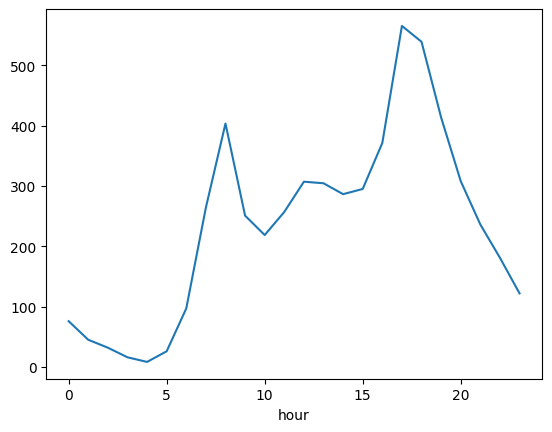

In [ ]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
index_F = bikes[ bikes['season'] != 'Verano' ].index
b_ver=bikes.drop(index_F)
gr=pd.DataFrame(b_ver.groupby('hour').total.mean())
b_ver.groupby('hour').total.mean().plot()
print(gr)

Cuando se hace el análisis solo para la temporada de verano, se puede ver que el comportamiento de la renta de bicicletas tiene una tendencia similar al caso completo; los picos de mayor demanda se presentan al inicio y fin de la jornada, alcanzado como máximo el número de 565 bicicletas a las 17 horas. Como ya se había concluído antes, en el verano promueve el uso de la bicicleta y esto se refleja en una mayor demanda

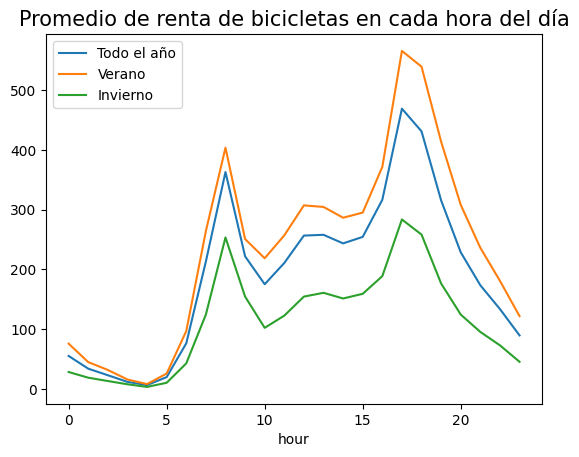

In [ ]:
#Gráfica del comportamiento de la renta promedio en cada hora del día
bikes.groupby('hour').total.mean().plot(label='Todo el año')
b_ver.groupby('hour').total.mean().plot(label='Verano')
b_inv.groupby('hour').total.mean().plot(label='Invierno')
plt.title("Promedio de renta de bicicletas en cada hora del día",fontsize=15)
plt.legend()

En esta gráfica se puede apreciar que los tres escenarios tienen la misma tendencia.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [151]:
#Librerías a cargar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor


In [160]:
# Celda 3

# Dividir en train y test
X, y = pd.DataFrame(bikes[['season','hour']]), bikes['total'] # Se separan las variables predictoras y la de respuesta
X= pd.get_dummies(X, prefix=['season']) # Convertir season a Dummy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% a train y 30% a test

In [153]:
# Modelo de regresion
lr = LinearRegression()
lr.fit(X_train, y_train)

predicciones = lr.predict(X_test)
MSE = np.average(np.square(predicciones - y_test))
print(f"El modelo tiene un MSE de: {MSE}")

print("Intercept:", lr.intercept_)
print("Coeficientes:", list(zip(X.columns, lr.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", lr.score(X, y))
print("MAPE:", mean_absolute_percentage_error(predicciones, y_test))

El modelo tiene un MSE de: 25333.687249926537
Intercept: 67.76621745948738
Coeficientes: [('hour', 10.61250703560769), ('season_Invierno', -76.06707512982872), ('season_Otoño', 9.235446340576356), ('season_Primavera', 23.589486281465277), ('season_Verano', 43.24214250778716)]
Coeficiente de determinación R^2: 0.22334214412102715
MAPE: 0.7680467666740631


De los coefientes se puede concluir que para la variable season, cuando toma valores de Otoño, Primavera y Verano tiene signo positivo, contrario para invierno. Por ser una variable categórica no es preciso interpretarlo como la razón con la que se afecta la variable a predecir pero el signo negativo puede interpretarse que para Invierno los datos están por debajo de la base; lo anterior se corrobora en la gráfica del punto anterior, donde se ve que la gráfica de Invierno está por debajo del promedio.

El modelo es capaz de explicar el 22.33% de la variabilidad observada en la variable respuesta. No obstante, el parámeto R2 no permite evaluar correctamente el desempeño del modelo, pues la tendencia de los datos no es lineal. 

El MAPE del modelo confirma que el desempeño no es bueno porque su valor es muy alto (0.76), lo cual indica que las predicciones en su mayoría difieren del valor real.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [182]:
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [186]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [183]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [184]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [187]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X_train, y_train, 5)
j, split, gain

# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [188]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [190]:
tree = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=6, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 190.30005247966412,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 7620,
 'gain': 18335.613191146098,
 'sl': {'y_pred': 1,
  'y_prob': 54.45713156854998,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 2529,
  'gain': 6761.848556612171,
  'sl': {'y_pred': 1,
   'y_prob': 32.657954033348354,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 2217,
   'gain': 602.8115239935332,
   'sl': {'y_pred': 1,
    'y_prob': 25.4392177589852,
    'level': 3,
    'split': [0, 2.0],
    'n_samples': 1890,
    'gain': 411.4549895885359,
    'sl': {'y_pred': 1,
     'y_prob': 45.208012326656394,
     'level': 4,
     'split': [1, 1.0],
     'n_samples': 647,
     'gain': 304.010682538571,
     'sl': {'y_pred': 1,
      'y_prob': 52.22950819672131,
      'level': 5,
      'split': [0, 1.0],
      'n_samples': 486,
      'gain': 318.59286018636794,
      'sl': {'y_pred': 1,
       'y_prob': 64.5860655737705,
       'level': 6,
       'split': -1,
       'n_samples': 242,
    

In [199]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
          predicted = predicted * tree['y_prob']
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [202]:
# Ejecución de función tree_predict
predicciones= tree_predict(X_test, tree)
print("MAPE:", mean_absolute_percentage_error(predicciones, y_test))

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [147]:
# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


In [179]:
# Celda 5
# Modelo con la librería de sklearn
clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X_train, y_train)
predicciones = clf.predict(X_test)
MSE=mean_squared_error(predicciones, y_test)
print(f"MSE del modelo: {MSE}")
print("MAPE:", mean_absolute_percentage_error(predicciones, y_test))


MSE del modelo: 15643.173614103363
MAPE: 0.5354905833322346


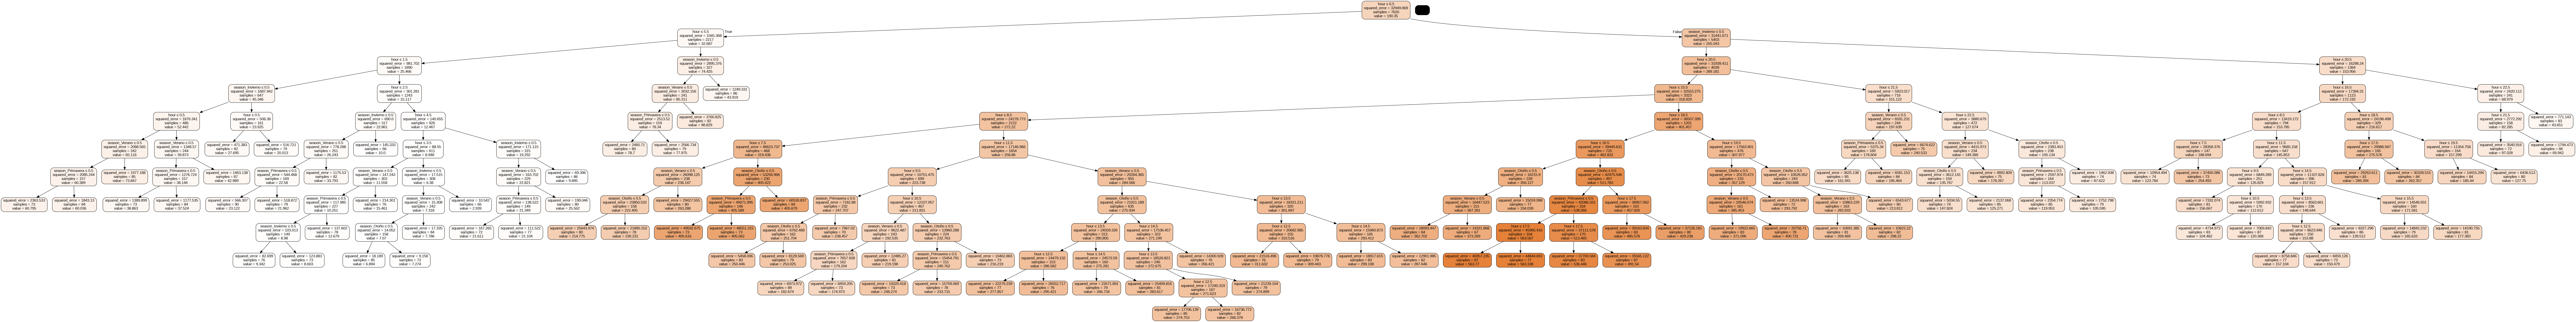

In [165]:
# Visualización del árbol para ver los nodos
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

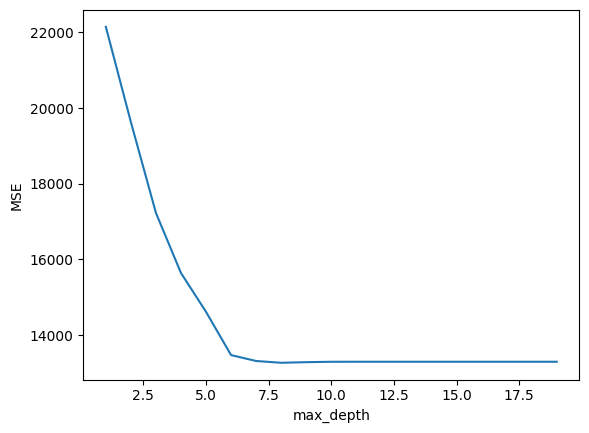

MSE del modelo ajustado: 13318.796122027125
MAPE: 0.49489947422787656


In [178]:
# Optimización parámetro max_depth
max_depth_range = range(1, 20)
MSE=[]
for depth in max_depth_range:
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    clf.fit(X_train, y_train)
    predicciones = clf.predict(X_test)
    MSE.append(mean_squared_error(predicciones, y_test))

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, MSE)
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.show()

# Se ajusta un árbol usando con el mínimo MSE 6
clf = DecisionTreeRegressor(max_depth=7, random_state=1)
clf.fit(X_train, y_train)
predicciones = clf.predict(X_test)
MSE=mean_squared_error(predicciones, y_test)
print(f"MSE del modelo ajustado: {MSE}")
print("MAPE:", mean_absolute_percentage_error(predicciones, y_test))

El desempeño del modelo con arboles de regresión es mucho mejor que la regresión líneal. El MSE tuvo una reducción cercana al 50% y el MAPE descendió a menos del 0.5. Adicionalmente, el gráfico del árbol permite comprender mejor la lógica de predicción y de esta manera identificar las variables relevantes. 

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [4]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

url  timedelta  \
0  http://mashable.com/2014/12/10/cia-torture-rep...       28.0   
1  http://mashable.com/2013/10/18/bitlock-kicksta...      447.0   
2  http://mashable.com/2013/07/24/google-glass-po...      533.0   
3  http://mashable.com/2013/11/21/these-are-the-m...      413.0   
4  http://mashable.com/2014/02/11/parking-ticket-...      331.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             9.0             188.0         0.732620               1.0   
1             7.0             297.0         0.653199               1.0   
2            11.0             181.0         0.660377               1.0   
3            12.0             781.0         0.497409               1.0   
4             8.0             177.0         0.685714               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.844262        5.0             1.0       1.0  ...   
1                  0.815789        9.0             4.0       1.0  ...   
2                  0.775701        4.0             3.0       1.0  ...   
3                  0.677350       10.0             3.0       1.0  ...   
4                  0.830357        3.0             2.0       1.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.200000                   0.80              -0.487500   
1               0.160000                   0.50              -0.135340   
2               0.136364                   1.00               0.000000   
3               0.100000                   1.00              -0.195701   
4               0.100000                   0.55              -0.175000   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                  -0.60              -0.250000                 0.9   
1                  -0.40              -0.050000                 0.1   
2                   0.00               0.000000                 0.3   
3                  -0.40              -0.071429                 0.0   
4                  -0.25              -0.100000                 0.0   

   title_sentiment_polarity  abs_title_subjectivity  \
0                       0.8                     0.4   
1                      -0.1                     0.4   
2                       1.0                     0.2   
3                       0.0                     0.5   
4                       0.0                     0.5   

   abs_title_sentiment_polarity  Popular  
0                           0.8        1  
1                           0.1        0  
2                           1.0        0  
3                           0.0        0  
4                           0.0        0  

[5 rows x 61 columns]

In [5]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [6]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [103]:
# Celda 6

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
import random

# Definición de 4 modelos diferentes: regresión logística y árbol de decisión
models = {'dt': DecisionTreeClassifier(),
          'lr': LogisticRegression()}

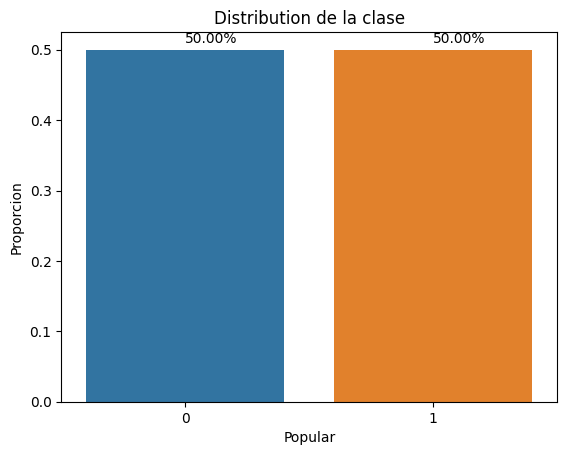

In [9]:
# Distribucion de clase
value_counts = df.Popular.value_counts(True)
sns.barplot(x=value_counts.index, y=value_counts.values)
for i in range(len(value_counts)):
    plt.text(x=i, y=value_counts.values[i]+0.01, s=f"{value_counts.values[i]*100:.2f}%")
plt.xlabel("Popular")
plt.ylabel("Proporcion")
plt.title("Distribution de la clase")
plt.show()

No hay imbalanceo de clases

In [10]:
# Estadisticas descriptivas
df.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  6000.000000     6000.000000       6000.000000      6000.000000   
mean    358.138833       10.368667        547.428833         0.527732   
std     210.734614        2.106140        510.232776         0.148356   
min       9.000000        3.000000          0.000000         0.000000   
25%     175.000000        9.000000        231.000000         0.465950   
50%     345.000000       10.000000        391.000000         0.541477   
75%     544.250000       12.000000        719.000000         0.614980   
max     731.000000       19.000000       8474.000000         0.967742   

       n_non_stop_words  n_non_stop_unique_tokens    num_hrefs  \
count       6000.000000               6000.000000  6000.000000   
mean           0.961333                  0.665823    11.874000   
std            0.192815                  0.167740    13.444103   
min            0.000000                  0.000000     0.000000   
25%            1.000000                  0.619624     4.000000   
50%            1.000000                  0.689119     8.000000   
75%            1.000000                  0.756237    15.000000   
max            1.000000                  1.000000   304.000000   

       num_self_hrefs     num_imgs   num_videos  ...  min_positive_polarity  \
count     6000.000000  6000.000000  6000.000000  ...            6000.000000   
mean         3.272500     4.954667     1.463167  ...               0.097194   
std          4.262895     8.635916     4.508144  ...               0.076585   
min          0.000000     0.000000     0.000000  ...               0.000000   
25%          1.000000     1.000000     0.000000  ...               0.050000   
50%          2.000000     1.000000     0.000000  ...               0.100000   
75%          4.000000     7.000000     1.000000  ...               0.100000   
max        116.000000   111.000000    91.000000  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count            6000.000000            6000.000000            6000.000000   
mean                0.762009              -0.265334              -0.530531   
std                 0.256845               0.133800               0.294477   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.340000              -0.714286   
50%                 0.800000              -0.260185              -0.500000   
75%                 1.000000              -0.191273              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count            6000.000000         6000.000000               6000.000000   
mean               -0.110047            0.296854                  0.077178   
std                 0.100482            0.334117                  0.282790   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.200000                  0.000000   
75%                -0.050000            0.500000                  0.166667   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity      Popular  
count             6000.000000                   6000.000000  6000.000000  
mean                 0.343496                      0.167633     0.500000  
std                  0.186815                      0.240462     0.500042  
min                  0.000000                      0.000000     0.000000  
25%                  0.166667                      0.000000     0.000000  
50%                  0.500000                      0.016667     0.500000  
75%                  0.500000                      0.250000     1.000000  
max                  0.500000         

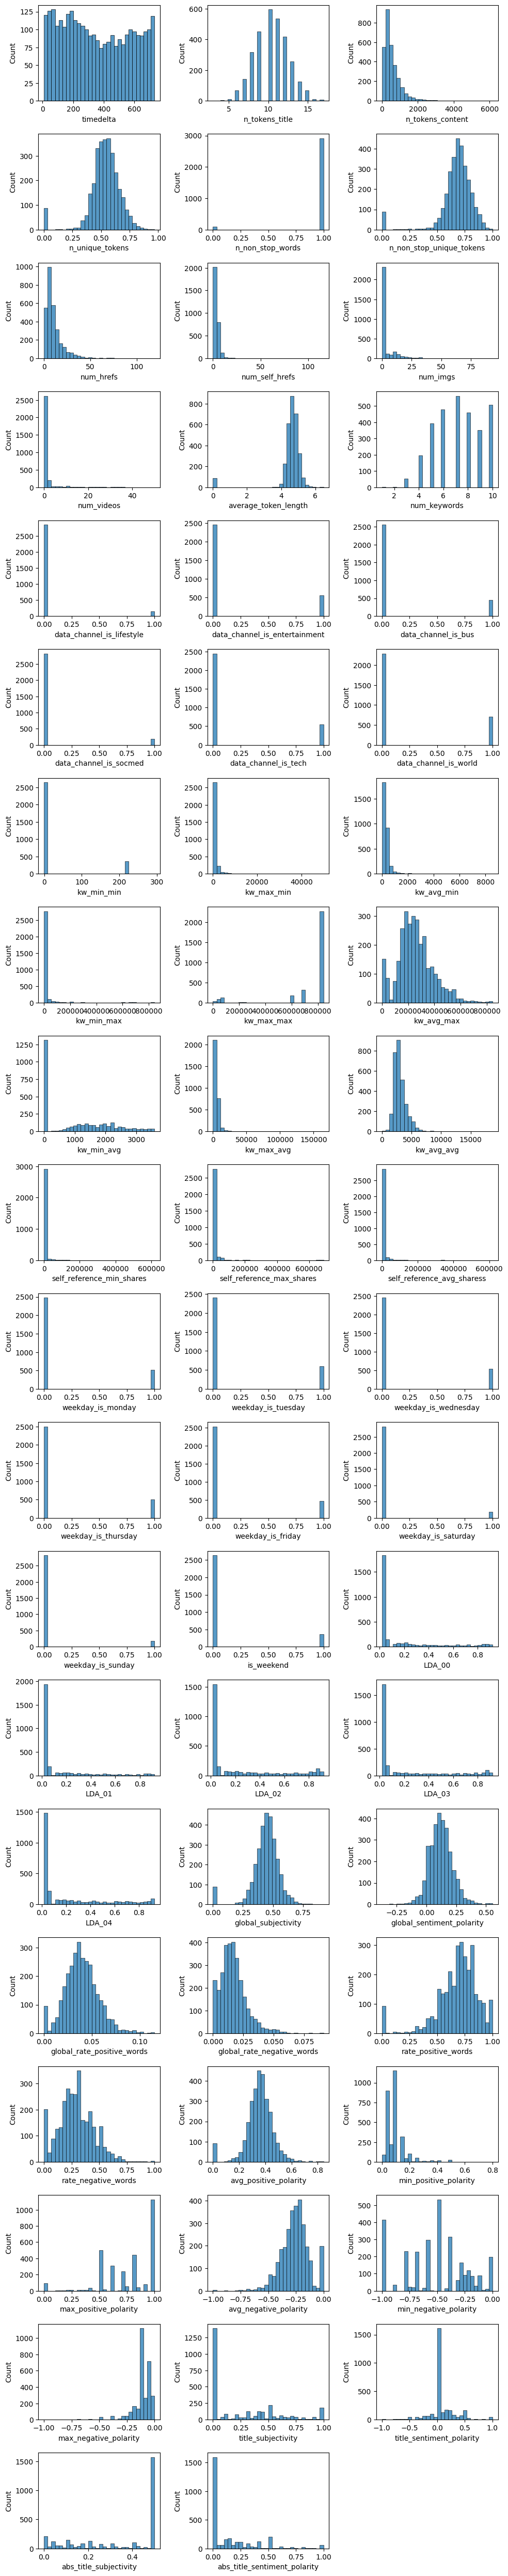

In [25]:
# Histogramas de variables predictoras clase = 0
fig, ax = plt.subplots(20, 3, figsize=(10, 50))
for idx, var in enumerate(df.drop(['url','Popular'], axis=1).columns):
    sns.histplot(x=var, data=df[df.Popular == 0], ax=ax.flatten()[idx], bins=30)
    plt.subplots_adjust(wspace=.5, hspace=.5)
fig.tight_layout()
fig.delaxes(ax.flatten()[-1])
plt.show()

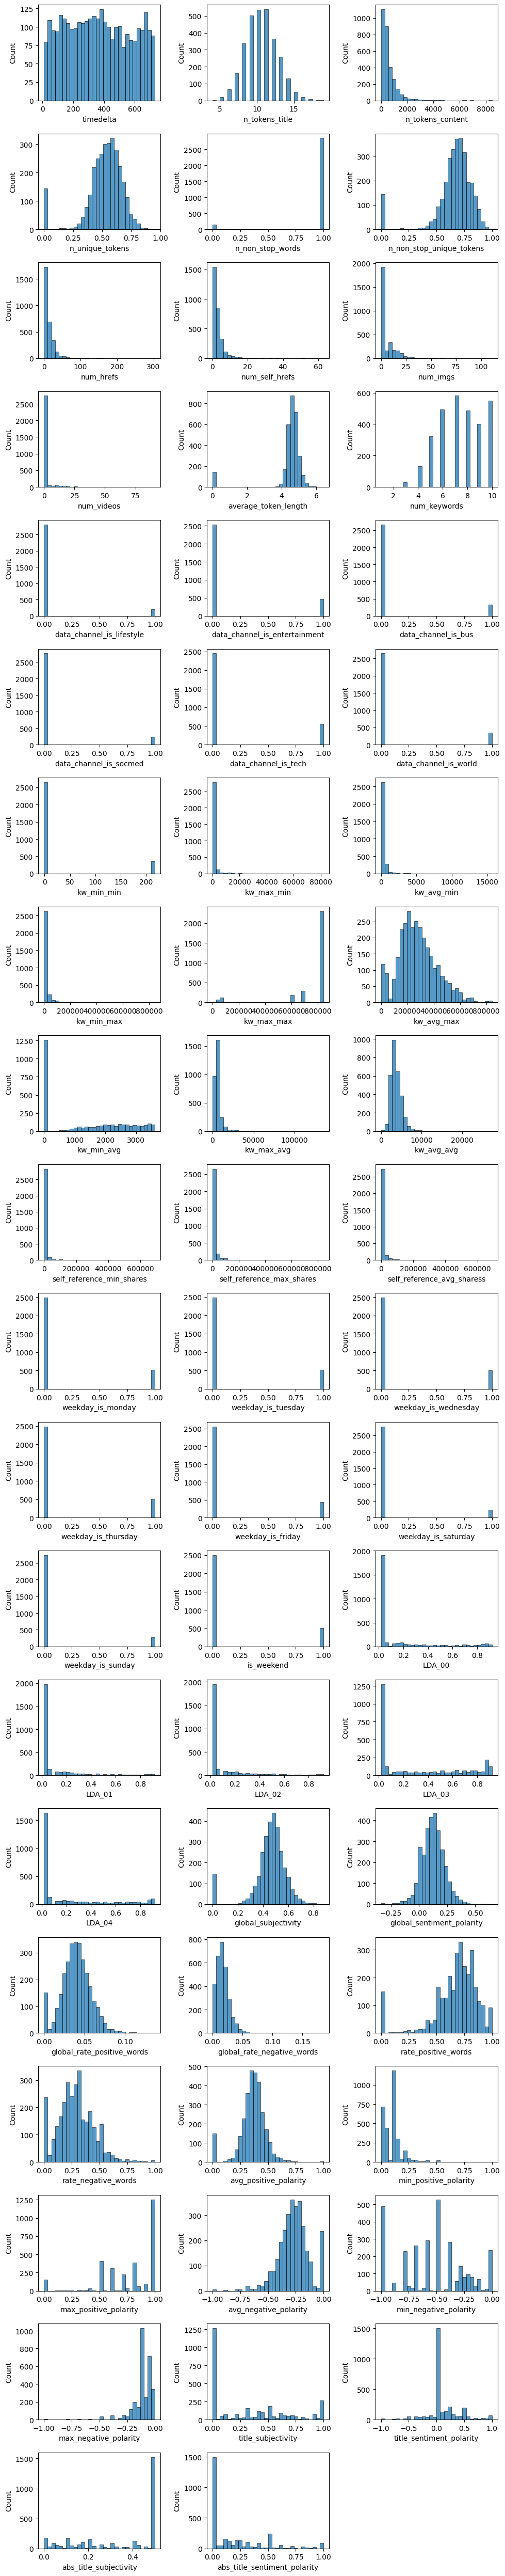

In [26]:
# Histogramas de variables predictoras clase = 1
fig, ax = plt.subplots(20, 3, figsize=(10, 50))
for idx, var in enumerate(df.drop(['url','Popular'], axis=1).columns):
    sns.histplot(x=var, data=df[df.Popular == 1], ax=ax.flatten()[idx], bins=30)
    plt.subplots_adjust(wspace=.5, hspace=.5)
fig.tight_layout()
fig.delaxes(ax.flatten()[-1])
plt.show()

In [63]:
# Entrenamiento (fit) de cada modelo
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    models[model].fit(X_train, y_train)
    y_pred[model] = models[model].predict(X_test)
    acc=metrics.accuracy_score(y_test, y_pred[model])
    print(f"Accuracy del modelo {model}: {acc}")
    f1=metrics.f1_score(y_test, y_pred[model])
    print(f"F1 score del modelo {model}: {f1}")

Accuracy del modelo dt: 0.538
F1 score del modelo dt: 0.5401459854014599
Accuracy del modelo lr: 0.6133333333333333
F1 score del modelo lr: 0.6102150537634409


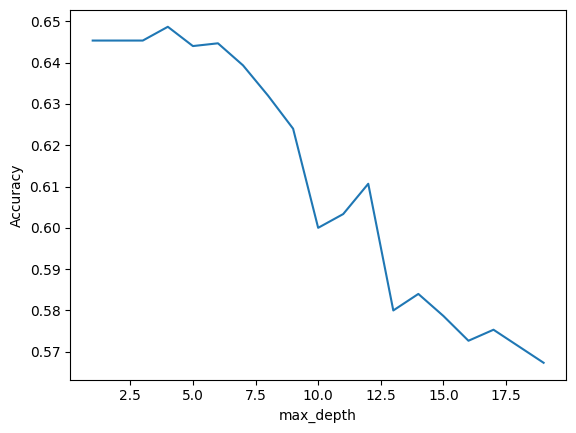

Accuracy del modelo DT: 0.6513333333333333 con max_depth de 4


In [47]:
# Optimización del árbol de decisión modificando el criterio y la profundidad
max_depth_range = range(1, 20)
accuracy_scores=[]
for depth in max_depth_range:
  clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
  clf.fit(X_train, y_train)
  predicciones = clf.predict(X_test)
  accuracy_scores.append(metrics.accuracy_score(y_test, predicciones))

# Gráfica max_depth versus Accuracy
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

# Mejor Accuracy (desempeño del modelo) y su correspondiente max_depth
b_tree= sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

# Se ajusta un árbol usando con el mejor MSE
clf = DecisionTreeClassifier(max_depth=b_tree[1])
clf.fit(X_train, y_train)
predicciones = clf.predict(X_test)
acc=metrics.accuracy_score(y_test, predicciones)
print(f"Accuracy del modelo DT: {acc} con max_depth de {b_tree[1]}")

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [85]:
# Celda 7
# Creación de 300 muestras de bootstrap
n_estimators = list(range(300))
# Se reorganiza la lista para que cada conjunto de 100 árboles no tenga un orden secuencial. El nuevo orden de la lista se utilizará como índice para la selección de la muestra
random.shuffle(n_estimators)

n_models=100
np.random.seed(3)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(len(n_estimators))]
seeds = np.random.randint(1, 10000, size=n_models)

In [132]:
# 100 árboles de decisión donde max_depth tome un valor de su elección

trees1 = {}
for i in range(n_models):
    trees1[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=4, random_state=seeds[i])
    trees1[i].fit(X_train.iloc[samples[n_estimators[i]]], y_train.iloc[samples[n_estimators[i]]])

# Predicción para los datos del set de test con cada modelo
y_pred_df1 = pd.DataFrame(index=X_test.index, columns=list(range(n_models)))
for i in range(n_models):
    y_pred_df1.iloc[:, i] = trees1[i].predict(X_test)

y_pred1 = (y_pred_df1.sum(axis=1) >= (n_models / 2)).astype(np.int)
acc= metrics.accuracy_score(y_pred1, y_test)
f1= metrics.f1_score(y_pred1, y_test)

print(f"Accuracy del modelo: {acc} ")
print(f"F1 score del modelo: {f1}")

Accuracy del modelo: 0.6613333333333333 
F1 score del modelo: 0.6481994459833795


In [133]:
# 100 árboles de decisión donde min_samples_leaf tome un valor de su elección

trees2 = {}
for i in range(n_models):
    trees2[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=4, min_samples_leaf= 10, random_state=seeds[i])
    trees2[i].fit(X_train.iloc[samples[n_estimators[i+100]]], y_train.iloc[samples[n_estimators[i+100]]])

# Predicción para los datos del set de test con cada modelo
y_pred_df2 = pd.DataFrame(index=X_test.index, columns=list(range(n_models)))
for i in range(n_models):
    y_pred_df2.iloc[:, i] = trees2[i].predict(X_test)

y_pred2 = (y_pred_df2.sum(axis=1) >= (n_models / 2)).astype(np.int)
acc= metrics.accuracy_score(y_pred2, y_test)
f1= metrics.f1_score(y_pred2, y_test)

print(f"Accuracy del modelo: {acc} ")
print(f"F1 score del modelo: {f1}")

Accuracy del modelo: 0.6633333333333333 
F1 score del modelo: 0.6571622539035982


In [134]:
# 100 regresiones logísticas

trees3 = {}
for i in range(n_models):
    trees3[i] = LogisticRegression()
    trees3[i].fit(X_train.iloc[samples[n_estimators[i+200]]], y_train.iloc[samples[n_estimators[i+200]]])

# Predicción para los datos del set de test con cada modelo
y_pred_df3 = pd.DataFrame(index=X_test.index, columns=list(range(n_models)))
for i in range(n_models):
    y_pred_df3.iloc[:, i] = trees3[i].predict(X_test)

y_pred3 = (y_pred_df3.sum(axis=1) >= (n_models / 2)).astype(np.int)
acc= metrics.accuracy_score(y_pred3, y_test)
f1= metrics.f1_score(y_pred3, y_test)

print(f"Accuracy del modelo: {acc} ")
print(f"F1 score del modelo: {f1}")

Accuracy del modelo: 0.6206666666666667 
F1 score del modelo: 0.617350369872226


In [138]:
# Votación mayoritaria con libreria sklearn para las 300 muestras

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features="sqrt", max_depth=4), n_estimators=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred5 = clf.predict(X_test)
acc= metrics.accuracy_score(y_pred5, y_test)
f1= metrics.f1_score(y_pred5, y_test)

print(f"Accuracy del modelo: {acc} ")
print(f"F1 score del modelo: {f1}")

Accuracy del modelo: 0.6653333333333333 
F1 score del modelo: 0.6608108108108108


Cuando se ensamblan los 3 modelos el Accuracy y F1 Score es un poco más alto que cuando se hace de manera independiente. 

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [127]:
# Celda 8
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_models)

In [135]:
# 100 árboles de decisión donde max_depth tome un valor de su elección

for i in range(n_models):
    y_pred_ = trees1[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df1) * alpha).sum(axis=1)

# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)
acc= metrics.accuracy_score(y_pred, y_test)
f1= metrics.f1_score(y_pred, y_test)

print(f"Accuracy del modelo: {acc} ")
print(f"F1 score del modelo: {f1}")


Accuracy del modelo: 0.6613333333333333 
F1 score del modelo: 0.6472222222222221


In [136]:
# 100 árboles de decisión donde min_samples_leaf tome un valor de su elección

for i in range(n_models):
    y_pred_ = trees2[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df2) * alpha).sum(axis=1)

# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)
acc= metrics.accuracy_score(y_pred, y_test)
f1= metrics.f1_score(y_pred, y_test)

print(f"Accuracy del modelo: {acc} ")
print(f"F1 score del modelo: {f1}")

Accuracy del modelo: 0.6626666666666666 
F1 score del modelo: 0.6543715846994536


In [137]:
# 100 regresiones logísticas

for i in range(n_models):
    y_pred_ = trees3[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df3) * alpha).sum(axis=1)

# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)
acc= metrics.accuracy_score(y_pred, y_test)
f1= metrics.f1_score(y_pred, y_test)

print(f"Accuracy del modelo: {acc} ")
print(f"F1 score del modelo: {f1}")

Accuracy del modelo: 0.6206666666666667 
F1 score del modelo: 0.617350369872226


In [140]:
# Votación ponderada con libreria sklearn para las 300 muestras

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
acc= metrics.accuracy_score(y_pred, y_test)
f1= metrics.f1_score(y_pred, y_test)

print(f"Accuracy del modelo: {acc} ")
print(f"F1 score del modelo: {f1}")

Accuracy del modelo: 0.662 
F1 score del modelo: 0.6539249146757679


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Los árboles de decisión son un muy buen modelo de machine learning porque tienen una alta interpretabilidad y precisión en la predicciones. Comparando los resultados entre Regresión Logística y Clasificación de arboles de decisión se puede apreciar un mejor desempeño del último, lo cual se refleja en un mayor Accurancy y F1 Score. Adicionalmente, los modelos de árboles tienen una ventaja y es que se pueden configurar diferentes parámetros para buscar una mayor precisión y es fácil entender el ajuste que se está realizando al modelo y a la lógica del algoritmo.

La votación mayoritaria y ponderada son técnicas que fortalecen la predicción de los modelos de clasificación.